<a href="https://colab.research.google.com/github/hacksJuanDavid/AnimeCharacterClassificationUsingDeepLearning/blob/main/AnimeCharacterClassificationUsingDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
import kagglehub
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [ ]:
# Define la ruta donde quieres guardar el dataset
dataset_folder = "/content/jujutsu_kaisen_dataset"
os.makedirs(dataset_folder, exist_ok=True)

# Descargar el conjunto de datos usando Kaggle API
!kaggle datasets download -d angelirodriguez/jujutsu-kaisen-character-dataset -p {dataset_folder}

# Descomprimir el archivo descargado
!unzip -q {dataset_folder}/jujutsu-kaisen-character-dataset.zip -d {dataset_folder}

print("Ruta de los archivos del dataset:", dataset_folder)

Dataset URL: https://www.kaggle.com/datasets/angelirodriguez/jujutsu-kaisen-character-dataset
License(s): MIT
100% 3.42G/3.43G [02:05<00:00, 34.5MB/s]
100% 3.43G/3.43G [02:05<00:00, 29.4MB/s]
Ruta de los archivos del dataset: /content/jujutsu_kaisen_dataset


In [ ]:
# Define of route folder "train"
train_folder = os.path.join(dataset_folder, "/content/jujutsu_kaisen_dataset/clean_jjk_data/train")

# List folders of train
for root, dirs, files in os.walk(train_folder):
    print(f"Directory: {root}")
#    for filename in files:
#        print(filename)

Directory: /content/jujutsu_kaisen_dataset/clean_jjk_data/train
Directory: /content/jujutsu_kaisen_dataset/clean_jjk_data/train/Noritosho Kamo
Directory: /content/jujutsu_kaisen_dataset/clean_jjk_data/train/Yuji Itadori
Directory: /content/jujutsu_kaisen_dataset/clean_jjk_data/train/Maki Zenin
Directory: /content/jujutsu_kaisen_dataset/clean_jjk_data/train/Mai Zenin
Directory: /content/jujutsu_kaisen_dataset/clean_jjk_data/train/Momo Nishimiya
Directory: /content/jujutsu_kaisen_dataset/clean_jjk_data/train/Kasumi Miwa
Directory: /content/jujutsu_kaisen_dataset/clean_jjk_data/train/Curse users
Directory: /content/jujutsu_kaisen_dataset/clean_jjk_data/train/Mahito
Directory: /content/jujutsu_kaisen_dataset/clean_jjk_data/train/Kento Nanami
Directory: /content/jujutsu_kaisen_dataset/clean_jjk_data/train/Curse
Directory: /content/jujutsu_kaisen_dataset/clean_jjk_data/train/Junpei Yoshino
Directory: /content/jujutsu_kaisen_dataset/clean_jjk_data/train/Sukuna
Directory: /content/jujutsu_kais

In [ ]:
# Directorio de las imágenes de entrenamiento
train_folder = "/content/jujutsu_kaisen_dataset/clean_jjk_data/train"
# Directorio donde guardaremos las imágenes en blanco y negro y redimensionadas
output_folder = "/content/jujutsu_kaisen_dataset/processed_train_128x128"

# Crear la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

# Tamaño al que queremos redimensionar las imágenes
new_size = (128, 128)

# Procesar cada subcarpeta en train_folder
for character_dir in os.listdir(train_folder):
    character_path = os.path.join(train_folder, character_dir)

    # Verificar si es un directorio
    if os.path.isdir(character_path):
        # Crear una carpeta para cada personaje en output_folder
        output_character_path = os.path.join(output_folder, character_dir)
        os.makedirs(output_character_path, exist_ok=True)

        # Procesar cada imagen en el directorio del personaje
        for img_name in os.listdir(character_path):
            img_path = os.path.join(character_path, img_name)

            # Asegurarse de que el archivo es una imagen
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Abrir la imagen
                img = Image.open(img_path)

                # Convertir a escala de grises y redimensionar
                img_gray = img.convert('L').resize(new_size)  # 'L' convierte a escala de grises

                # Guardar la imagen procesada
                output_img_path = os.path.join(output_character_path, img_name)
                img_gray.save(output_img_path)

print("Todas las imágenes han sido convertidas a blanco y negro, redimensionadas y guardadas.")

Todas las imágenes han sido convertidas a blanco y negro, redimensionadas y guardadas.


In [ ]:
# Directorio de las imágenes de entrenamiento
train_folder = "/content/jujutsu_kaisen_dataset/clean_jjk_data/val"
# Directorio donde guardaremos las imágenes en blanco y negro y redimensionadas
output_folder = "/content/jujutsu_kaisen_dataset/processed_val_128x128"

# Crear la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

# Tamaño al que queremos redimensionar las imágenes
new_size = (128, 128)

# Procesar cada subcarpeta en train_folder
for character_dir in os.listdir(train_folder):
    character_path = os.path.join(train_folder, character_dir)

    # Verificar si es un directorio
    if os.path.isdir(character_path):
        # Crear una carpeta para cada personaje en output_folder
        output_character_path = os.path.join(output_folder, character_dir)
        os.makedirs(output_character_path, exist_ok=True)

        # Procesar cada imagen en el directorio del personaje
        for img_name in os.listdir(character_path):
            img_path = os.path.join(character_path, img_name)

            # Asegurarse de que el archivo es una imagen
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Abrir la imagen
                img = Image.open(img_path)

                # Convertir a escala de grises y redimensionar
                img_gray = img.convert('L').resize(new_size)  # 'L' convierte a escala de grises

                # Guardar la imagen procesada
                output_img_path = os.path.join(output_character_path, img_name)
                img_gray.save(output_img_path)

print("Todas las imágenes han sido convertidas a blanco y negro, redimensionadas y guardadas.")

Todas las imágenes han sido convertidas a blanco y negro, redimensionadas y guardadas.


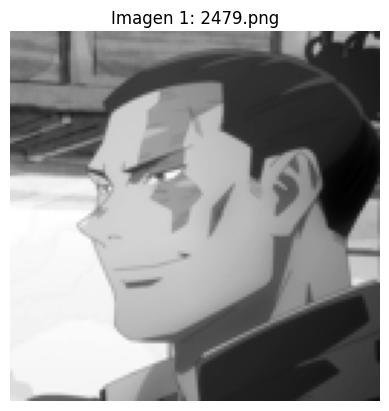

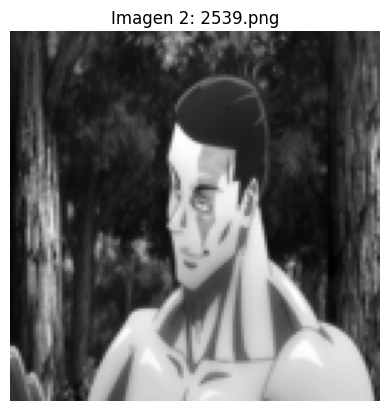

In [ ]:
# Ruta de la carpeta que contiene las imágenes
image_folder = "/content/jujutsu_kaisen_dataset/processed_train_128x128/Aoi Todo"

# Obtener una lista de todos los archivos en la carpeta
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

# Mostrar las primeras 4 imágenes (ajusta el rango si necesitas ver más)
num_images_to_plot = min(2, len(image_files)) # Asegurarse de que no intente mostrar más imágenes de las que existen

for i in range(num_images_to_plot):
    image_path = os.path.join(image_folder, image_files[i])

    try:
        img = mpimg.imread(image_path)
        plt.figure()
        plt.imshow(img, cmap='gray') # Mostrar imágenes en escala de grises
        plt.title(f"Imagen {i + 1}: {image_files[i]}")
        plt.axis('off')
    except Exception as e:
        print(f"Error al cargar o mostrar la imagen {image_files[i]}: {e}")

plt.show()

In [ ]:
# Directorio donde están las imágenes de entrenamiento
train_folder = "/content/jujutsu_kaisen_dataset/processed_train_128x128"

# Lista para almacenar la información de los metadatos
metadata_list = []

# Recorrer cada subcarpeta en train_folder
for character_dir in os.listdir(train_folder):
    character_path = os.path.join(train_folder, character_dir)

    # Verificar si es un directorio
    if os.path.isdir(character_path):
        # Procesar cada imagen en el directorio del personaje
        for img_name in os.listdir(character_path):
            img_path = os.path.join(character_path, img_name)

            # Asegurarse de que el archivo es una imagen
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Abrir la imagen
                with Image.open(img_path) as img:
                    # Extraer los metadatos
                    metadata = {
                        "file_name": img_name,
                        "character": character_dir,
                        "file_path": img_path,
                        "format": img.format,
                        "mode": img.mode,
                        "size": img.size,  # (ancho, alto)
                        "width": img.width,
                        "height": img.height,
                    }
                    metadata_list.append(metadata)

# Save metada in dataframe
df = pd.DataFrame(metadata_list)
df.to_csv("/content/jujutsu_kaisen_dataset/metadata_train.csv", index=False)

# Print dataframe
df

,file_name,character,file_path,format,mode,size,width,height
0,3166.png,Sorcerer,/content/jujutsu_kaisen_dataset/processed_trai...,PNG,L,"(128, 128)",128,128
1,3760.png,Sorcerer,/content/jujutsu_kaisen_dataset/processed_trai...,PNG,L,"(128, 128)",128,128
2,4273.png,Sorcerer,/content/jujutsu_kaisen_dataset/processed_trai...,PNG,L,"(128, 128)",128,128
3,2770.png,Sorcerer,/content/jujutsu_kaisen_dataset/processed_trai...,PNG,L,"(128, 128)",128,128
4,3804.png,Sorcerer,/content/jujutsu_kaisen_dataset/processed_trai...,PNG,L,"(128, 128)",128,128
...,...,...,...,...,...,...,...,...
3454,2702.png,Satoru Gojo,/content/jujutsu_kaisen_dataset/processed_trai...,PNG,L,"(128, 128)",128,128
3455,1130.png,Satoru Gojo,/content/jujutsu_kaisen_dataset/processed_trai...,PNG,L,"(128, 128)",128,128
3456,5.png,Satoru Gojo,/content/jujutsu_kaisen_dataset/processed_trai...,PNG,L,"(128, 128)",128,128
3457,3524.png,Satoru Gojo,/content/jujutsu_kaisen_dataset/processed_trai...,PNG,L,"(128, 128)",128,128


In [ ]:
# Directorio donde están las imágenes de entrenamiento
train_folder = "/content/jujutsu_kaisen_dataset/processed_val_128x128"

# Lista para almacenar la información de los metadatos
metadata_list = []

# Recorrer cada subcarpeta en train_folder
for character_dir in os.listdir(train_folder):
    character_path = os.path.join(train_folder, character_dir)

    # Verificar si es un directorio
    if os.path.isdir(character_path):
        # Procesar cada imagen en el directorio del personaje
        for img_name in os.listdir(character_path):
            img_path = os.path.join(character_path, img_name)

            # Asegurarse de que el archivo es una imagen
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Abrir la imagen
                with Image.open(img_path) as img:
                    # Extraer los metadatos
                    metadata = {
                        "file_name": img_name,
                        "character": character_dir,
                        "file_path": img_path,
                        "format": img.format,
                        "mode": img.mode,
                        "size": img.size,  # (ancho, alto)
                        "width": img.width,
                        "height": img.height,
                    }
                    metadata_list.append(metadata)

# Save metada in dataframe
df = pd.DataFrame(metadata_list)
df.to_csv("/content/jujutsu_kaisen_dataset/metadata_val.csv", index=False)

# Print dataframe
df

,file_name,character,file_path,format,mode,size,width,height
0,3484.png,Sorcerer,/content/jujutsu_kaisen_dataset/processed_val_...,PNG,L,"(128, 128)",128,128
1,997.png,Sorcerer,/content/jujutsu_kaisen_dataset/processed_val_...,PNG,L,"(128, 128)",128,128
2,3593.png,Sorcerer,/content/jujutsu_kaisen_dataset/processed_val_...,PNG,L,"(128, 128)",128,128
3,2816.png,Sorcerer,/content/jujutsu_kaisen_dataset/processed_val_...,PNG,L,"(128, 128)",128,128
4,2787.png,Sorcerer,/content/jujutsu_kaisen_dataset/processed_val_...,PNG,L,"(128, 128)",128,128
...,...,...,...,...,...,...,...,...
857,2341.png,Satoru Gojo,/content/jujutsu_kaisen_dataset/processed_val_...,PNG,L,"(128, 128)",128,128
858,4134.png,Satoru Gojo,/content/jujutsu_kaisen_dataset/processed_val_...,PNG,L,"(128, 128)",128,128
859,1213.png,Satoru Gojo,/content/jujutsu_kaisen_dataset/processed_val_...,PNG,L,"(128, 128)",128,128
860,207.png,Satoru Gojo,/content/jujutsu_kaisen_dataset/processed_val_...,PNG,L,"(128, 128)",128,128


In [ ]:
# Load the metadata for training and validation sets
train_metadata = pd.read_csv("/content/jujutsu_kaisen_dataset/metadata_train.csv")
val_metadata = pd.read_csv("/content/jujutsu_kaisen_dataset/metadata_val.csv")

# Count the number of images in each set
train_count = len(train_metadata)
val_count = len(val_metadata)

print(f"Number of training images: {train_count}")
print(f"Number of validation images: {val_count}")

Number of training images: 3459
Number of validation images: 862


In [ ]:
import os
import shutil

# Define the paths to your train and validation folders
train_folder = "/content/jujutsu_kaisen_dataset/clean_jjk_data/train"
val_folder = "/content/jujutsu_kaisen_dataset/clean_jjk_data/val"

# Define the character to remove (replace "civilians" with the actual name)
character_to_remove = "Civilians"


def remove_character_images(folder_path, character_name):
  """Removes all images of the specified character from a folder.

  Args:
      folder_path: The path to the folder containing the character folders.
      character_name: The name of the character folder to remove.
  """
  character_folder = os.path.join(folder_path, character_name)
  if os.path.exists(character_folder):
    try:
        # Use shutil to remove the directory and its contents

        shutil.rmtree(character_folder)
        print(f"Removed '{character_name}' folder from '{folder_path}'")
    except OSError as e:
        print(f"Error removing '{character_name}' folder: {e}")
  else:
      print(f"Character '{character_name}' folder not found in '{folder_path}'.")


# Remove the character from the train folder
remove_character_images(train_folder, character_to_remove)

# Remove the character from the validation folder
remove_character_images(val_folder, character_to_remove)

Removed 'Civilians' folder from '/content/jujutsu_kaisen_dataset/clean_jjk_data/train'
Removed 'Civilians' folder from '/content/jujutsu_kaisen_dataset/clean_jjk_data/val'


In [ ]:
# Ruta al directorio de entrenamiento (con imágenes de 128x128 y en blanco y negro)
# train_dir = "/content/jujutsu_kaisen_dataset/processed_train_128x128"
# val_dir = "/content/jujutsu_kaisen_dataset/processed_val_128x128"

train_dir = "/content/jujutsu_kaisen_dataset/clean_jjk_data/train"
val_dir = "/content/jujutsu_kaisen_dataset/clean_jjk_data/val"

# Configuración para los generadores de datos
train_datagen = ImageDataGenerator(
    rescale=3./255,
)

val_datagen = ImageDataGenerator(
    rescale=3./255,
)

# Crear generadores de datos
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),  # Tamaño de las imágenes
    batch_size=32,  # Tamaño del lote
    color_mode='rgb', # Modo de colores
    class_mode='categorical'  # Modo de clasificación (categórica)
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128,128),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical'
)

Found 3158 images belonging to 20 classes.
Found 770 images belonging to 20 classes.


In [ ]:
model = Sequential([
    # Input
    Input(shape=(128, 128, 3)),  # Para imágenes en color (RGB)

    # Primera capa convolucional + MaxPooling + Dropout
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Segunda capa convolucional + MaxPooling + Dropout
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Tercera capa convolucional + MaxPooling + Dropout
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Cuarta capa convolucional + MaxPooling + Dropout
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Quinta capa convolucional + MaxPooling + Dropout
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Aplanar la salida para pasar a una capa densa
    Flatten(),

    # Capa densa
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout en la capa densa

    # Capa de salida con 20 unidades (para las 20 clases)
    Dense(20, activation='softmax')  # 20 clases para clasificación multiclase
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           5,140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 665,204 (2.54 MB)

 Trainable params: 665,204 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Reducr LR
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Earling stopping4
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Model train
history = model.fit(
    train_generator,
    epochs=40,
    validation_data=val_generator,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 267s 3s/step - accuracy: 0.2054 - loss: 2.7670 - val_accuracy: 0.2558 - val_loss: 2.5795 - learning_rate: 0.0010
Epoch 2/40
99/99 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.2471 - loss: 2.4827 - val_accuracy: 0.2922 - val_loss: 2.4464 - learning_rate: 0.0010
Epoch 3/40
99/99 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.2943 - loss: 2.4086 - val_accuracy: 0.2805 - val_loss: 2.4098 - learning_rate: 0.0010
Epoch 4/40
99/99 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.3122 - loss: 2.3223 - val_accuracy: 0.3208 - val_loss: 2.2480 - learning_rate: 0.0010
Epoch 5/40
99/99 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.3528 - loss: 2.1747 - val_accuracy: 0.3338 - val_loss: 2.1900 - learning_rate: 0.0010
Epoch 6/40
99/99 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.3826 - loss: 2.0659 - val_accuracy: 0.3922 - val_loss: 2.0649 - learning_rate: 0.0010
Epoch 7/40
99/99 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.4453 - loss: 1.8837 - val_accuracy: 0.44

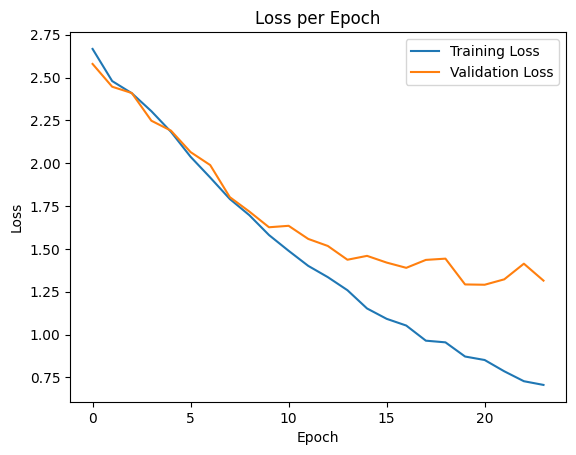

In [10]:
def plot_loss_per_epoch(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Assuming 'history' is the variable holding the training history
plot_loss_per_epoch(history)

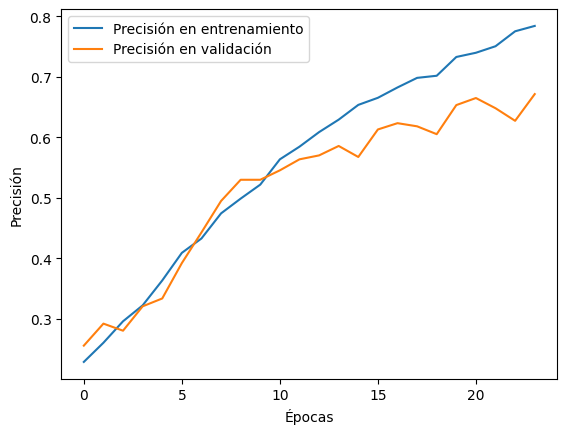

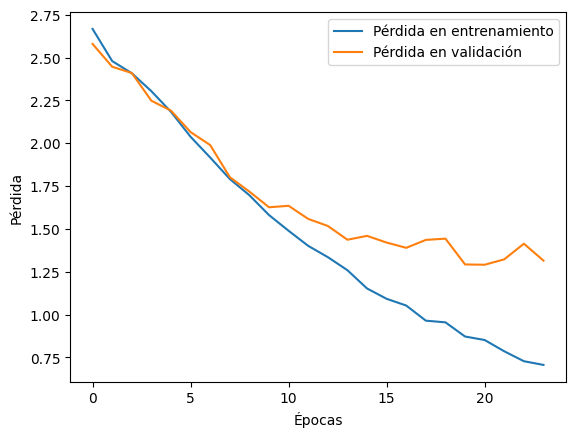

In [11]:
# Precisión
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Pérdida
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [17]:
# Evaluación en el conjunto de validación
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Precisión en validación: {val_accuracy:.2f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6433 - loss: 1.3665
Precisión en validación: 0.66


In [18]:
# Function to predict character
def predict_character(img_path, model, target_size=(128, 128)):
    img = image.load_img(img_path, target_size=target_size)  # Load and resize image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)  # Get prediction probabilities
    predicted_class_index = np.argmax(prediction)  # Get index of highest probability

    # Get the class names from the train_generator (assuming it's available)
    class_names = list(train_generator.class_indices.keys())
    predicted_character = class_names[predicted_class_index]

    return predicted_character, prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


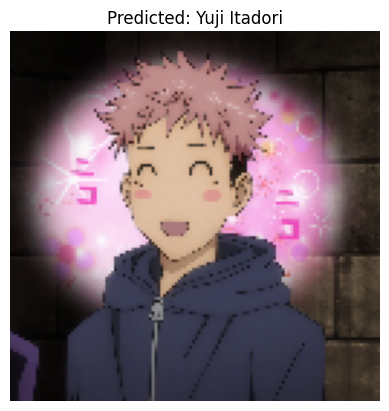

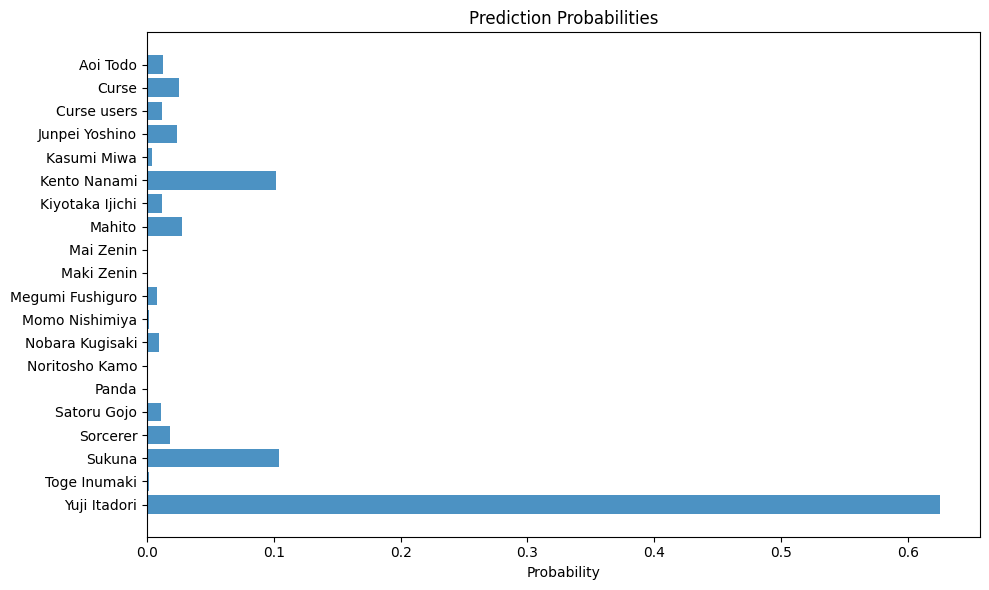

In [16]:
# Function to plot the characters predicction in based class category
def plot_predictions(img_path, model, target_size=(128, 128)):
    predicted_character, prediction = predict_character(img_path, model)

    # Load and display the image
    img = image.load_img(img_path, target_size=target_size)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_character}")

    # Prepare prediction probabilities for plotting
    class_names = list(train_generator.class_indices.keys())
    probabilities = prediction[0]  # Take probabilities for the first (and only) image
    y_pos = np.arange(len(class_names))

    # Create the bar plot
    plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility
    plt.barh(y_pos, probabilities, align='center', alpha=0.8)
    plt.yticks(y_pos, class_names)
    plt.xlabel('Probability')
    plt.title('Prediction Probabilities')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest probability at the top
    plt.tight_layout()
    plt.show()

# Example usage (replace with your image path)
image_path_to_predict = "/content/jujutsu_kaisen_dataset/clean_jjk_data/val/Yuji Itadori/1044.png"
plot_predictions(image_path_to_predict, model)

In [19]:
# prompt: save the model train
model.save('jujutsu_kaisen_model_66%.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


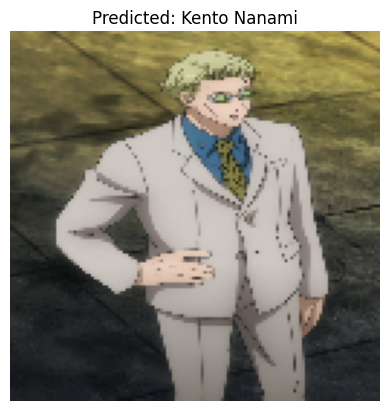

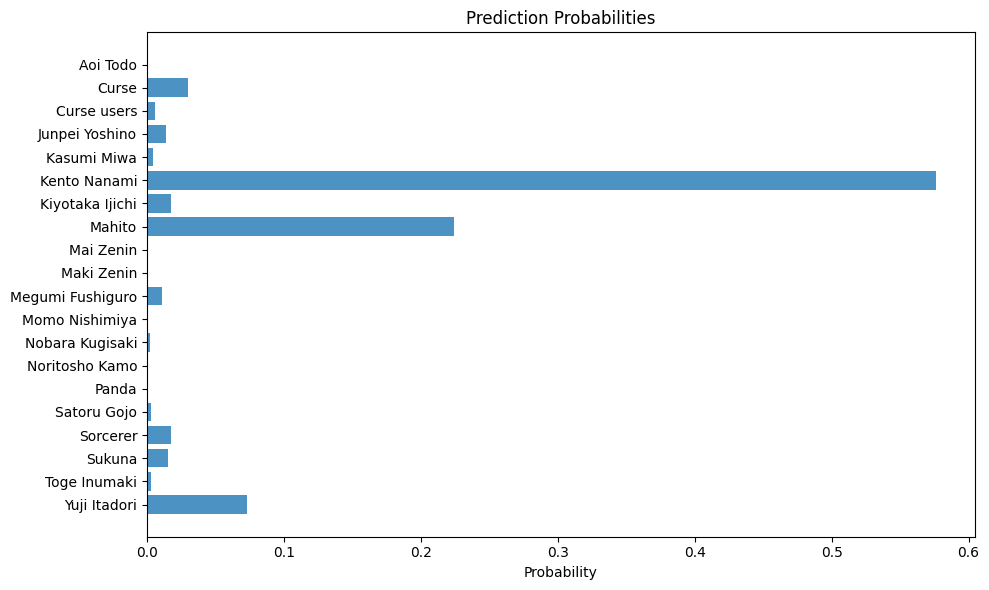

In [20]:
# Load the saved model
model = keras.models.load_model('jujutsu_kaisen_model_66%.h5')

# Example usage (replace with your image path)
image_path_to_predict = "/content/jujutsu_kaisen_dataset/clean_jjk_data/val/Kento Nanami/1493.png"
plot_predictions(image_path_to_predict, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


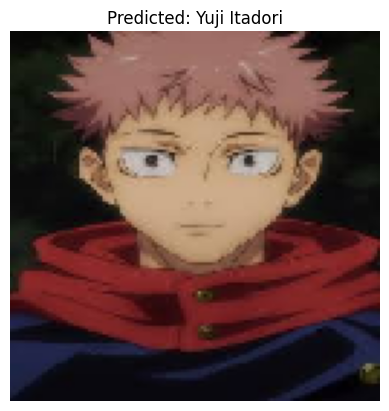

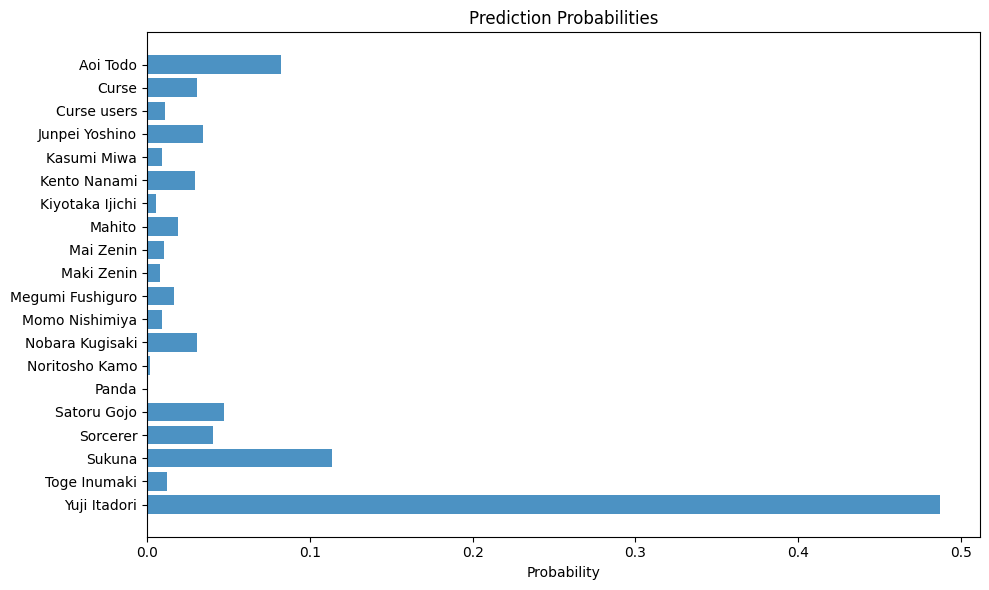

In [21]:
# prompt: Predict using model an image 000.png

image_path_to_predict = "/content/000.png"
plot_predictions(image_path_to_predict, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


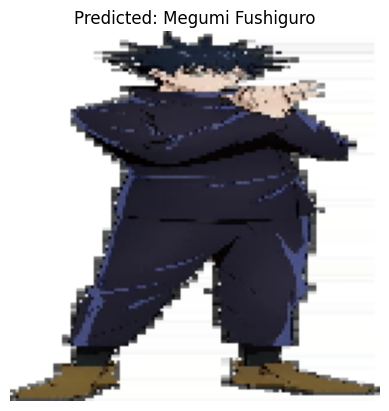

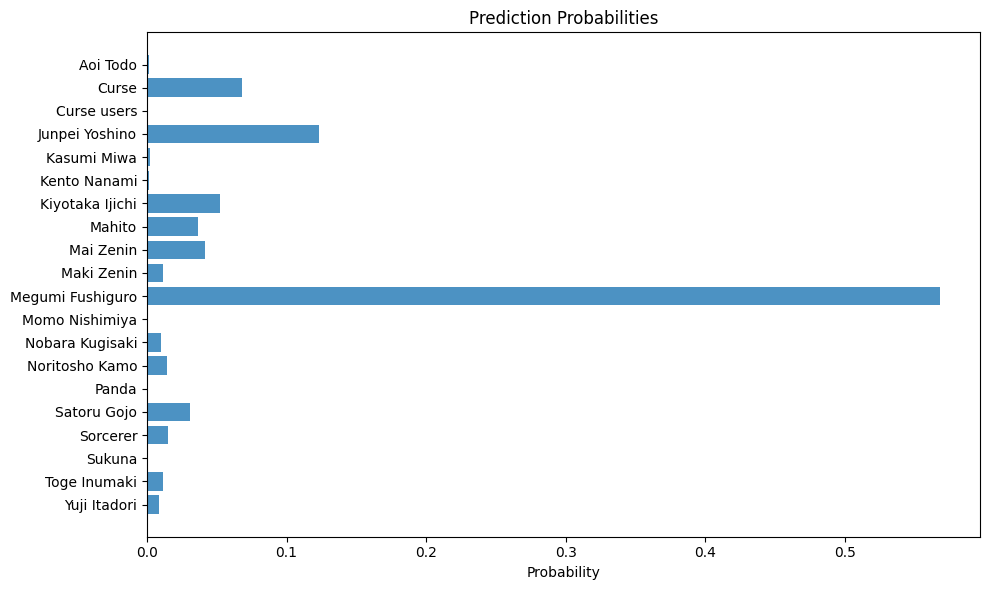

In [24]:
# prompt: Predict using model an image 003.png

image_path_to_predict = "/content/003.png"
plot_predictions(image_path_to_predict, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


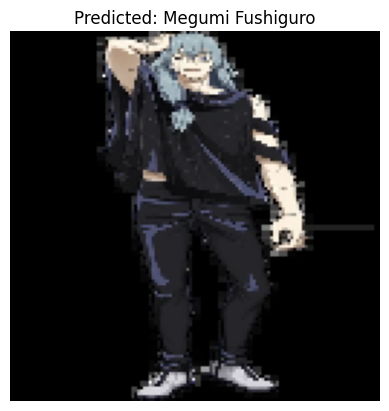

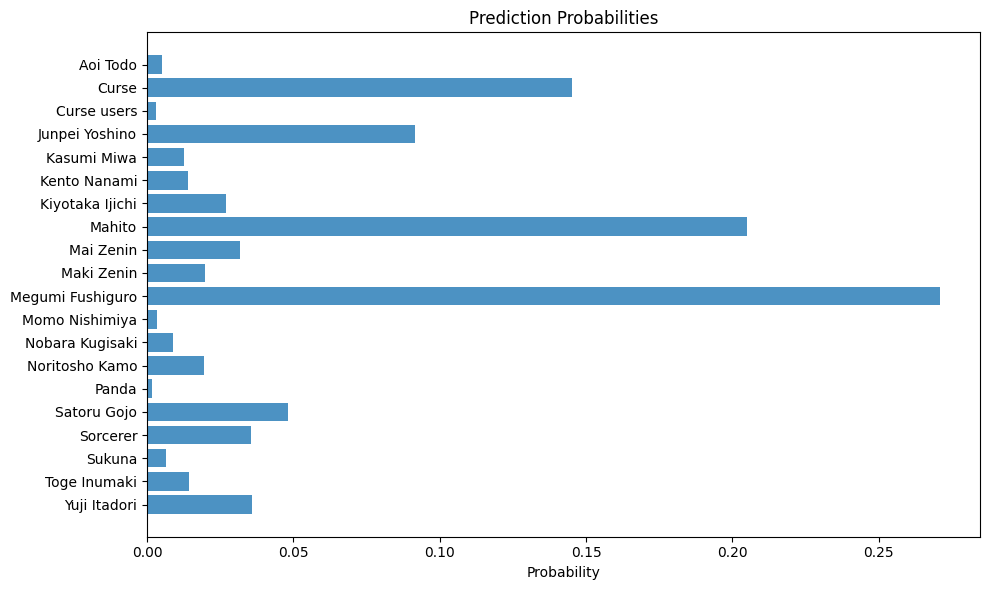

In [27]:
# prompt: Predict using model an image 005.png

image_path_to_predict = "/content/005.png"
plot_predictions(image_path_to_predict, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


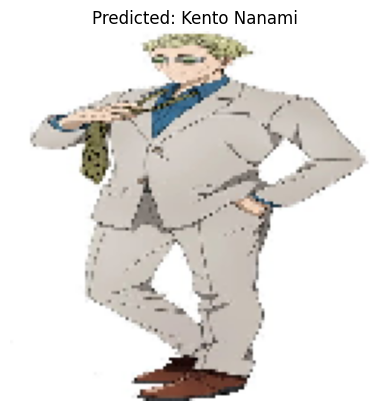

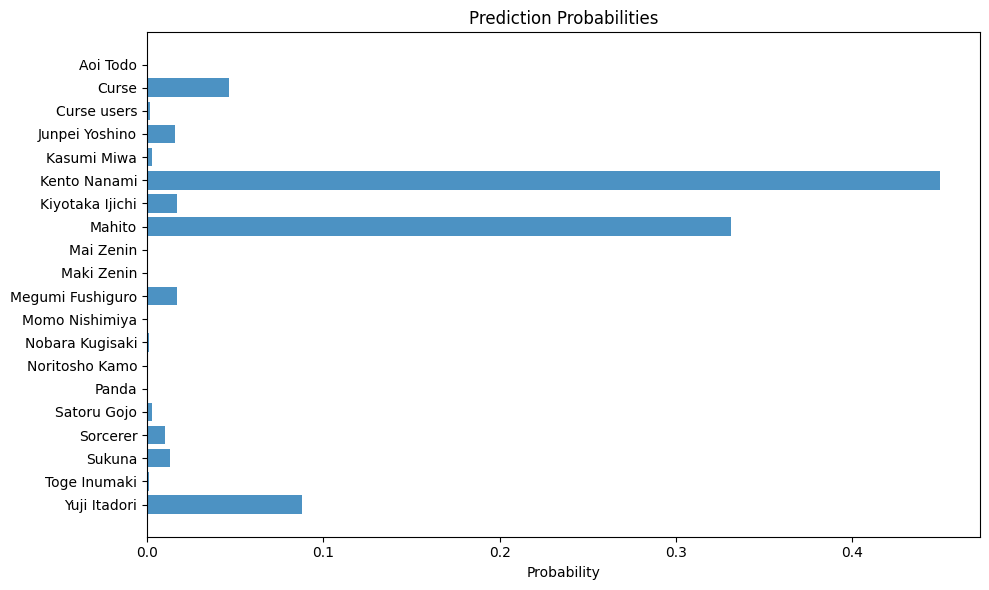

In [28]:
# prompt: Predict using model an image 006.png

image_path_to_predict = "/content/006.png"
plot_predictions(image_path_to_predict, model)